In [ ]:
import os
import glob
import numpy as np
import pandas as pd
from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import seaborn as sns
from random import random


from PIL import Image
from skimage.io import imread, imshow
sns.set(style="whitegrid")
%matplotlib inline


import os
import os.path
import shutil


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img



from sklearn.model_selection import train_test_split


from numpy.random import seed
seed(108)

import warnings
warnings.filterwarnings('ignore')

In [13]:
%pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/f4/5a/ba91b8c57aa37dbd80d5ff958576a9a8c14317b04b671ae7f0d09b00993a/scikit_learn-1.7.0-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.7.0-cp311-cp311-win_amd64.whl.metadata (14 kB)
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/7d/4f/1195bbac8e0c2acc5f740661631d8d750dc38d4a32b23ee5df3cde6f4e0d/joblib-1.5.1-py3-none-any.whl.metadata
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.whl.metadata
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.7.0-cp311-cp311-win_amd64.whl (10.7 MB)
Using cached joblib-1.5.1-py3-none-any.whl (307 kB)
Using cached threadpoolctl-3.6.


[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# 1. Tüm sınıf kodlarını ve tam isimlerini tek bir yerde tut:
LESION_CLASSES = [
    ("nv", "Melanocytic nevi"),
    ("mel", "Melanoma"),
    ("bkl", "Benign keratosis"),
    ("bcc", "Basal cell carcinoma"),
    ("akiec", "Actinic keratoses"),
    ("vasc", "Vascular lesions"),
    ("df", "Dermatofibroma"),
]

# 2. Kısa koddan tam isme sözlük oluştur (mapping)
def get_lesion_type_dict():
    return {code: name for code, name in LESION_CLASSES}

# 3. Sınıf kodundan otomatik index sözlüğü oluştur
def get_lesion_index_dict():
    return {code: idx for idx, (code, _) in enumerate(LESION_CLASSES)}

# 4. Görsel id'den tam path'e sözlük oluştur
def get_imageid_path_dict(base_dir):
    image_paths = glob.glob((os.path.join(base_dir, '*.jpg')))  # SADECE TEK KLASÖR!
    return {os.path.splitext(os.path.basename(path))[0]: path for path in image_paths}


# 2. Klasör ve metadata yolu
base_skin_dir = r"C:\Users\sanem\Masaüstü\cancer\ham10000_project\Data\HAM10000_all_images"
metadata_path = r"C:\Users\sanem\Masaüstü\cancer\ham10000_project\Data\HAM10000_metadata.csv"

imageid_path_dict = get_imageid_path_dict(base_skin_dir)
lesion_type_dict = get_lesion_type_dict()
lesion_index_dict = get_lesion_index_dict()

# Örnek çıktı:
print("nv ->", lesion_type_dict["nv"])   # "Melanocytic nevi"
print("nv index ->", lesion_index_dict["nv"])  # 0
print("Her görsel id ve path örneği:", list(imageid_path_dict.items())[:2])  # İlk iki örnek



nv -> Melanocytic nevi
nv index -> 0
Her görsel id ve path örneği: [('ISIC_0024306', 'C:\\Users\\sanem\\Masaüstü\\cancer\\ham10000_project\\Data\\HAM10000_all_images\\ISIC_0024306.jpg'), ('ISIC_0024307', 'C:\\Users\\sanem\\Masaüstü\\cancer\\ham10000_project\\Data\\HAM10000_all_images\\ISIC_0024307.jpg')]


In [5]:
import pandas as pd

df = pd.read_csv(metadata_path)  

# image_id ve label sütunları üzerinden ilerle:
df["image_path"] = df["image_id"].map(imageid_path_dict)
df["lesion_type"]     = df["dx"].map(lesion_type_dict.get)
df["lesion_type_idx"] = df["dx"].map(lesion_index_dict.get)

print(df.sample(20))


        lesion_id      image_id    dx    dx_type   age     sex  \
7487  HAM_0002641  ISIC_0034111    nv      histo  40.0  female   
2135  HAM_0007242  ISIC_0030047   mel      histo  70.0  female   
6039  HAM_0003166  ISIC_0030848    nv  follow_up  50.0  female   
6056  HAM_0002178  ISIC_0024401    nv  follow_up  25.0  female   
1412  HAM_0000709  ISIC_0034006   mel      histo  45.0  female   
2847  HAM_0005184  ISIC_0029644   bcc      histo  40.0  female   
6049  HAM_0006424  ISIC_0032256    nv  follow_up  20.0    male   
3153  HAM_0004395  ISIC_0025206    nv  follow_up  50.0  female   
1143  HAM_0003110  ISIC_0032114    df      histo  65.0    male   
5945  HAM_0006880  ISIC_0029672    nv  follow_up  60.0    male   
2933  HAM_0006658  ISIC_0026154   bcc      histo  85.0    male   
9028  HAM_0003785  ISIC_0025908    nv      histo  65.0    male   
3884  HAM_0007325  ISIC_0026267    nv  follow_up  55.0    male   
4458  HAM_0006508  ISIC_0030342    nv  follow_up  50.0  female   
3932  HAM_

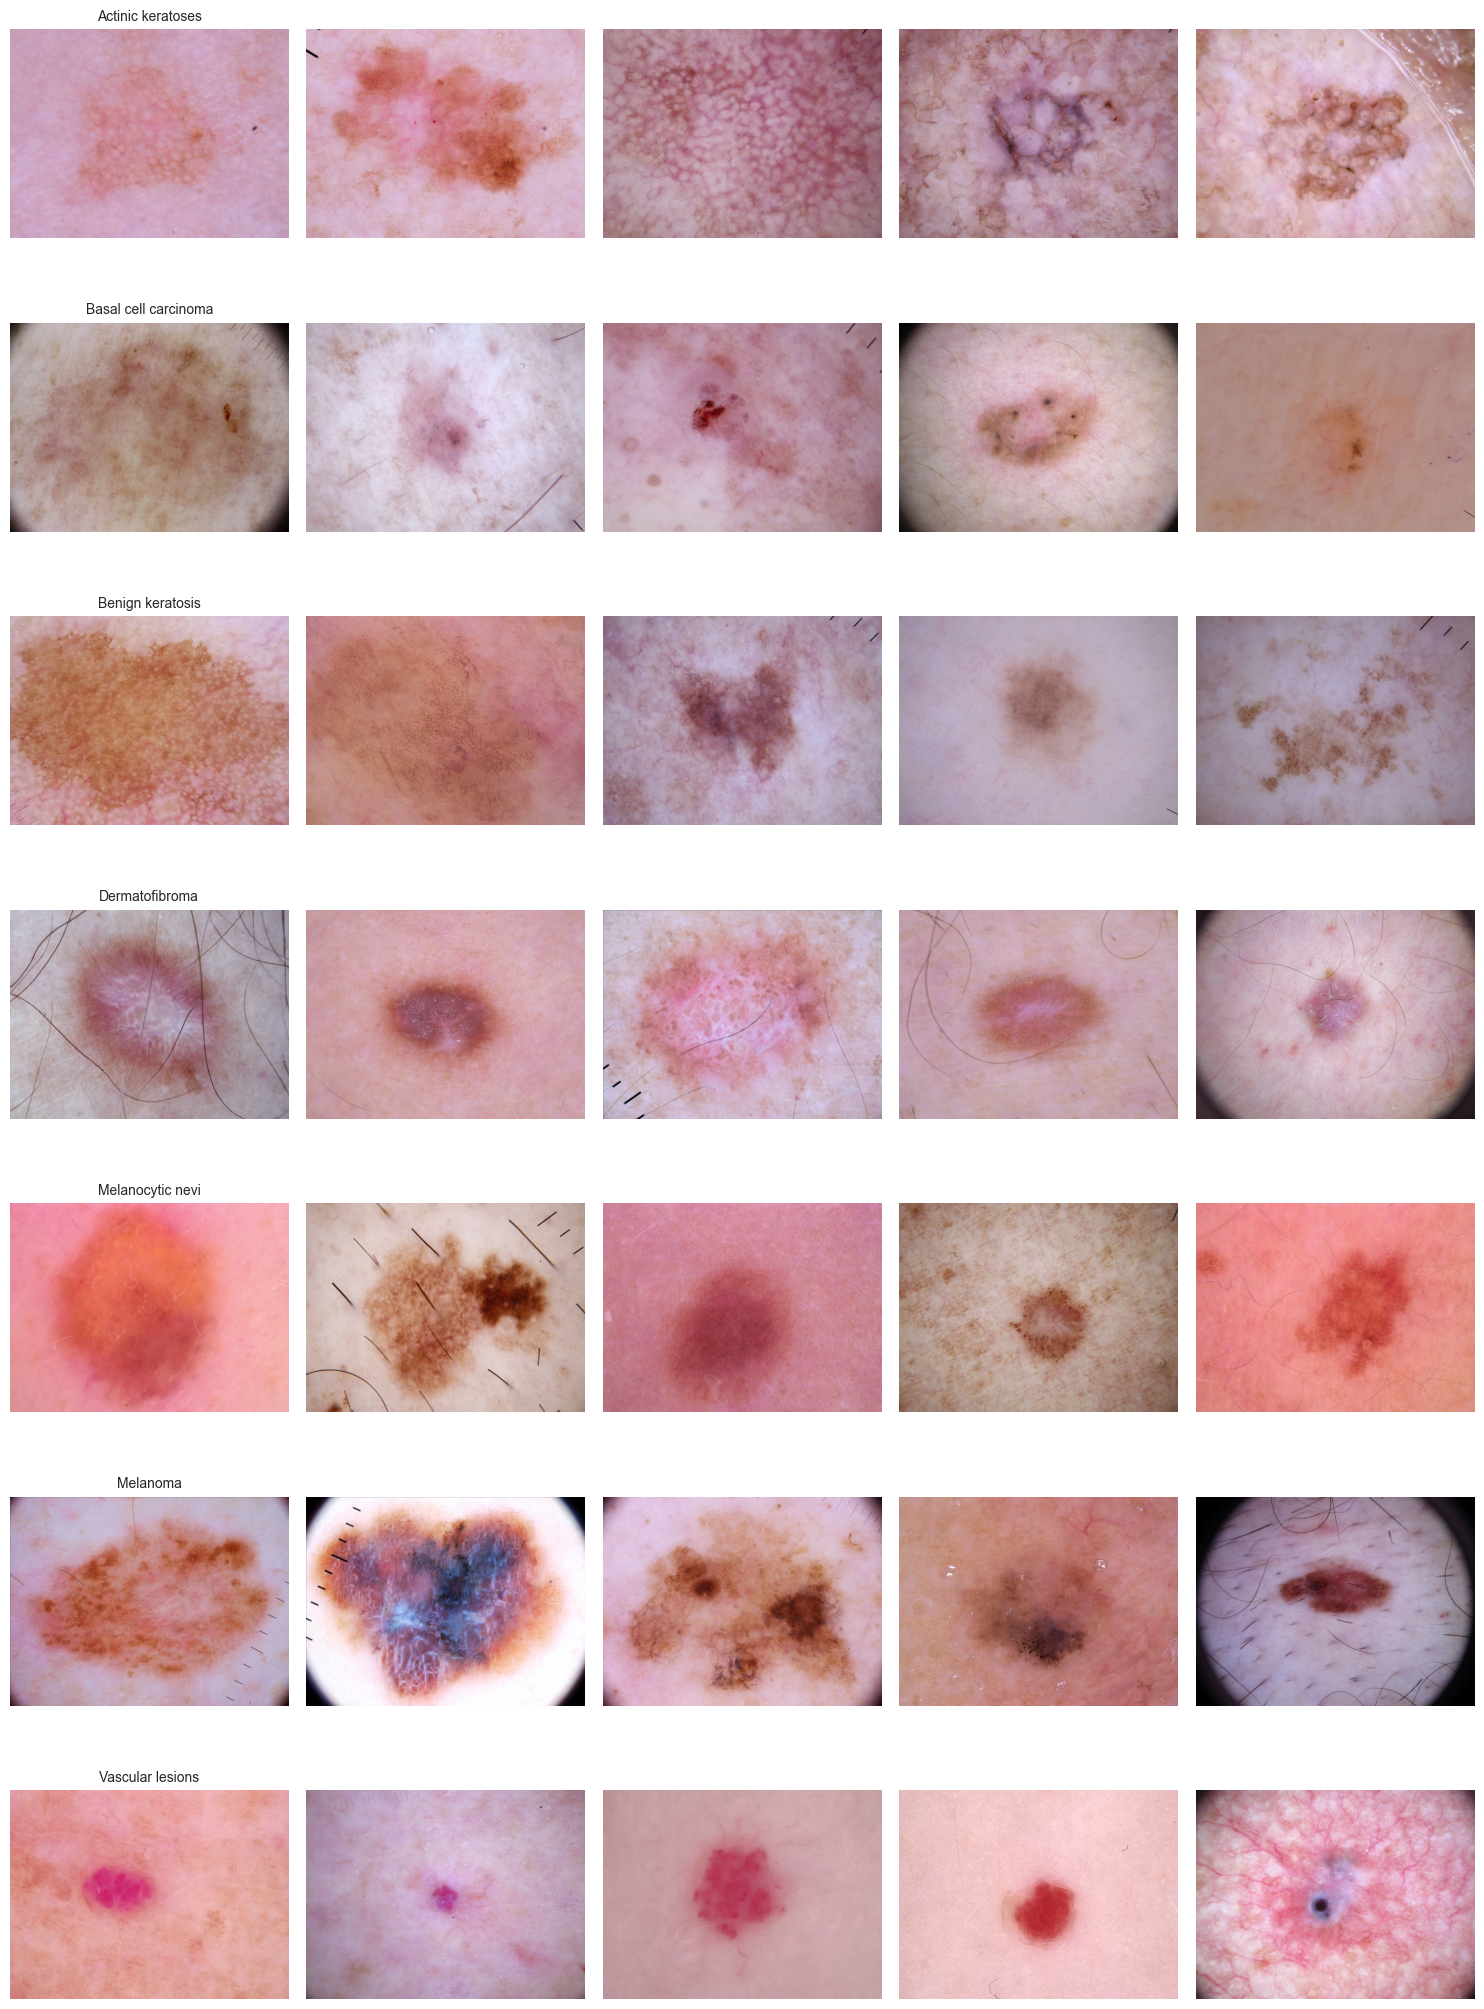

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Her sınıftan 5 örnek seç
sample_df = df.groupby("lesion_type").apply(lambda x: x.sample(min(5, len(x)), random_state=42)).reset_index(drop=True)

# Sınıf sayısı ve kolon/row ayarla
classes = sample_df["lesion_type"].unique()
n_classes = len(classes)
n_samples = 5

plt.figure(figsize=(n_samples * 3, n_classes * 3))

for i, cell_type in enumerate(classes):
    class_samples = sample_df[sample_df["lesion_type"] == cell_type]
    for j, (_, row) in enumerate(class_samples.iterrows()):
        img = mpimg.imread(row["image_path"])
        ax = plt.subplot(n_classes, n_samples, i * n_samples + j + 1)
        ax.imshow(img)
        ax.axis("off")
        if j == 0:
            ax.set_title(cell_type, fontsize=10)
        else:
            ax.set_title("")

plt.tight_layout()
plt.show()


In [7]:
df["lesion_type"].value_counts()

lesion_type
Melanocytic nevi        6705
Melanoma                1113
Benign keratosis        1099
Basal cell carcinoma     514
Actinic keratoses        327
Vascular lesions         142
Dermatofibroma           115
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

# Hangi lesion_id'den kaçar tane var?
lesion_counts = df["lesion_id"].value_counts()

# Sadece tekli (unique) lesion_id'ler
unique_lesion_ids = lesion_counts[lesion_counts == 1].index

# Sadece unique olan görselleri çek
unique_lesion_df = df[df["lesion_id"].isin(unique_lesion_ids)]

# 5. (İsteğe bağlı) Multi-görselli lesion_id'ler
multi_lesion_df = df[~df["lesion_id"].isin(unique_lesion_ids)]

# 6. Unique görsellerin %55'ini test+val, %45'ini train olarak ayır (sınıf dengeli!)
y = unique_lesion_df['dx']
train_unique, testval_unique = train_test_split(
    unique_lesion_df,
    test_size=0.55,  # Yaklaşık tüm veri setinin %30'u test+val olur
    stratify=y,
    random_state=42
)

# 7. Test+val'ın %20'sini validasyon olarak ayır (geri kalanı test)
y_val = testval_unique['dx']
test_unique, val_unique = train_test_split(
    testval_unique,
    test_size=0.2,  # Test+val'ın %20'si validasyon
    stratify=y_val,
    random_state=42
)

# 8. Train'e çoklu (duplicate) lesion_id'li tüm görselleri de ekle
train_df = pd.concat([multi_lesion_df, train_unique], ignore_index=True)
test_df  = test_unique.reset_index(drop=True)
val_df   = val_unique.reset_index(drop=True)

print("Train set:", train_df.shape)
print("Test set :", test_df.shape)
print("Val set  :", val_df.shape)

Train set: (6982, 10)
Test set : (2426, 10)
Val set  : (607, 10)


In [9]:
train_df['dx'].value_counts()

dx
nv       4276
mel       986
bkl       857
bcc       418
akiec     244
vasc      107
df         94
Name: count, dtype: int64

In [10]:
# 1. Sınıf isimleri ve indexlerini güvenli şekilde al
aug_df = train_df[['lesion_type', 'lesion_type_idx']].drop_duplicates() \
    .sort_values('lesion_type_idx').reset_index(drop=True)

# 2. Her sınıf için örnek sayılarını dictionary olarak al
class_counts = train_df['lesion_type'].value_counts().to_dict()

# 3. Hedef sample sayısı: en büyük sınıf
target_image_count = max(class_counts.values())

# 4. Her sınıf için multiplier: En büyük sınıf 0, diğerleri için bölme
def multiplier_fn(x):
    if class_counts[x] == target_image_count:
        return 0
    else:
        return target_image_count // class_counts[x]

aug_df['aug_multiplier'] = aug_df['lesion_type'].map(multiplier_fn)

print(aug_df)


            lesion_type  lesion_type_idx  aug_multiplier
0      Melanocytic nevi                0               0
1              Melanoma                1               4
2      Benign keratosis                2               4
3  Basal cell carcinoma                3              10
4     Actinic keratoses                4              17
5      Vascular lesions                5              39
6        Dermatofibroma                6              45


In [11]:
# Eğer aug_df şöyleyse:
# lesion_type | lesion_type_idx | aug_multiplier

aug_dict = dict(zip(aug_df['lesion_type_idx'], aug_df['aug_multiplier']))
print(aug_dict)


{0: 0, 1: 4, 2: 4, 3: 10, 4: 17, 5: 39, 6: 45}


In [12]:
# Create a new column in our training dataframe that has our augmentation value for each sample
train_df['aug_multiplier'] = train_df['lesion_type_idx'].map(lambda x: aug_dict.get(x))

In [ ]:
# Sonuçta oluşturulacak dengeli (balanced) veri seti için ana dizin oluşturuluyor
balanced_dir = 'balanced_dir2'
os.mkdir(balanced_dir)

# Eğitim, test ve doğrulama alt klasörleri oluşturuluyor
train_dir = os.path.join(balanced_dir, 'train')
os.mkdir(train_dir)

test_dir = os.path.join(balanced_dir, 'test')
os.mkdir(test_dir)

valid_dir = os.path.join(balanced_dir, 'valid')
os.mkdir(valid_dir)

# Her veri kümesinde (train, test, valid) sınıf etiketlerine göre klasörler oluşturuluyor
def create_class_directories(path):
    nv = os.path.join(path, 'nv')       # Melanositik nevi (ben)
    os.mkdir(nv)

    mel = os.path.join(path, 'mel')     # Melanom
    os.mkdir(mel)

    bkl = os.path.join(path, 'bkl')     # Benign keratoz benzeri lezyonlar
    os.mkdir(bkl)

    bcc = os.path.join(path, 'bcc')     # Bazal hücreli karsinom
    os.mkdir(bcc)

    akiec = os.path.join(path, 'akiec') # Aktinik keratoz / in situ karsinom
    os.mkdir(akiec)

    vasc = os.path.join(path, 'vasc')   # Vasküler lezyonlar
    os.mkdir(vasc)

    df = os.path.join(path, 'df')       # Dermatofibroma
    os.mkdir(df)

# Her veri kümesi için sınıf klasörleri oluşturuluyor
create_class_directories(train_dir)
create_class_directories(test_dir)
create_class_directories(valid_dir)


FileExistsError: [WinError 183] Halen varolan bir dosya oluşturulamaz: 'balanced_dir2'

In [ ]:

datagen = ImageDataGenerator(
        rescale=None,
        rotation_range=30,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        featurewise_center=False,  
        samplewise_center=False,
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        fill_mode='reflect')

In [32]:
train_df.columns

Index(['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'sex', 'localization',
       'image_path', 'lesion_type', 'lesion_type_idx'],
      dtype='object')

In [ ]:
# Her eğitim görüntüsü için, belirtilen çoğaltma sayısı kadar (aug_multiplier) veri artırımı yapılır
for _, row in train_df.iterrows():
    if row['aug_multiplier'] == 0:
        continue  # Eğer çoğaltma sayısı 0 ise (örneğin 'nv' sınıfı), bu görüntü atlanır

    image = load_img(row['image_path'])  # Görüntü dosyasını PIL formatında yükle
    image_array = img_to_array(image)    # Görüntüyü NumPy dizisine çevir
    image_array = np.expand_dims(image_array, axis=0)  # (600, 450, 3) → (1, 600, 450, 3)

    save_path = os.path.join(balanced_dir, 'train', row['dx'])  # Sınıfa göre kayıt dizinini belirle
    num_generated = 0  # Üretilen görüntü sayısını takip etmek için sayaç

    for augmented_batch in datagen.flow(image_array, batch_size=1,
                                        save_to_dir=save_path,
                                        save_format='jpeg'):
        num_generated += 1
        if num_generated >= row['aug_multiplier']:
            break  # İstenen sayıda artırılmış görüntü üretildiğinde döngüden çık


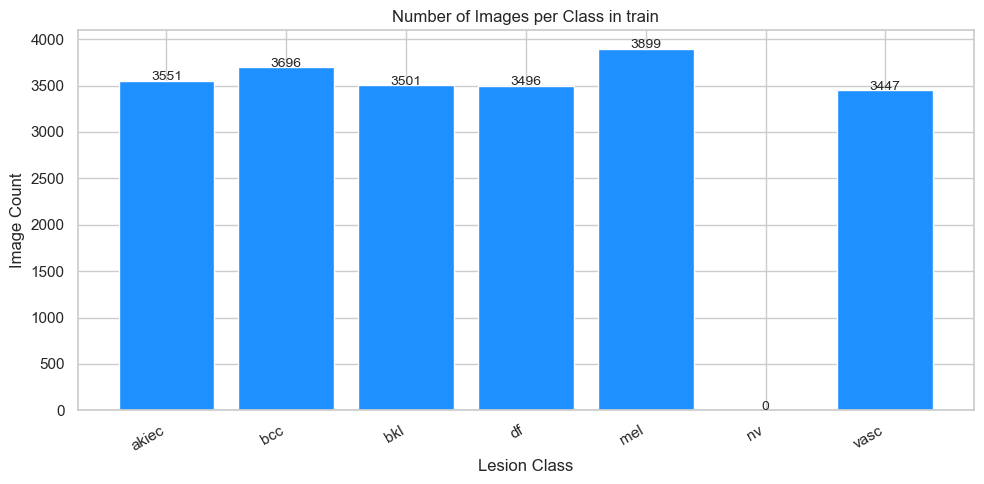

In [35]:
import os
import matplotlib.pyplot as plt

def plot_image_counts(base_dir, subfolder='train'):
    counts = {}
    base_path = os.path.join(base_dir, subfolder)
    # Her lesion index için
    for class_idx in os.listdir(base_path):
        class_path = os.path.join(base_path, class_idx)
        if os.path.isdir(class_path):
            count = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
            counts[class_idx] = count

    # Sıralama için: index -> isim dönüşümü
    index2name = {str(idx): name for idx, (code, name) in enumerate(LESION_CLASSES)}
    labels = [index2name.get(idx, idx) for idx in counts.keys()]

    # Grafik çizimi
    plt.figure(figsize=(10,5))
    plt.bar(labels, counts.values(), color='dodgerblue')
    plt.xlabel('Lesion Class')
    plt.ylabel('Image Count')
    plt.title('Number of Images per Class in {}'.format(subfolder))
    plt.xticks(rotation=30, ha='right')
    for i, v in enumerate(counts.values()):
        plt.text(i, v + 5, str(v), ha='center', fontsize=10)
    plt.tight_layout()
    plt.show()

# Kullanım
plot_image_counts(balanced_dir, subfolder='train')


In [3]:
import os
import shutil

# Klasör yolları
all_images_dir = r"C:\Users\sanem\Desktop\cancer\Data\HAM10000_all_images"

# Liste olarak klasördeki tüm dosyalar
folder_1 = os.listdir(all_images_dir)
# İkinci klasör kullanılmıyor, o kısmı silebiliriz

train_list = list(train_df['image_id'])
test_list  = list(test_df['image_id'])
valid_list = list(val_df['image_id'])

# Kendi fonksiyonunu tanımla
def transfer_images(image_list, src_dir, dst_dir, df):
    """
    Belirtilen image_list'teki görselleri, orijinal dizinden (src_dir)
    uygun altklasörlere (etiketine göre) hedef dizine (dst_dir) kopyalar.
    """
    for image in image_list:
        fname = image + '.jpg'
        if fname in folder_1:
            label = df.loc[image, 'dx']
            src = os.path.join(src_dir, fname)
            dst_folder = os.path.join(dst_dir, label)
            os.makedirs(dst_folder, exist_ok=True)  # Hedef klasör yoksa oluştur
            dst = os.path.join(dst_folder, fname)
            shutil.copyfile(src, dst)

# DataFrame index ayarı
transfer_df = df.set_index('image_id')

# Kopyalama işlemleri
transfer_images(train_list, all_images_dir, train_dir, transfer_df)
transfer_images(test_list, all_images_dir, test_dir, transfer_df)
transfer_images(valid_list, all_images_dir, valid_dir, transfer_df)




FileNotFoundError: [WinError 3] Sistem belirtilen yolu bulamıyor: 'C:\\Users\\sanem\\Desktop\\cancer\\Data\\HAM10000_all_images'

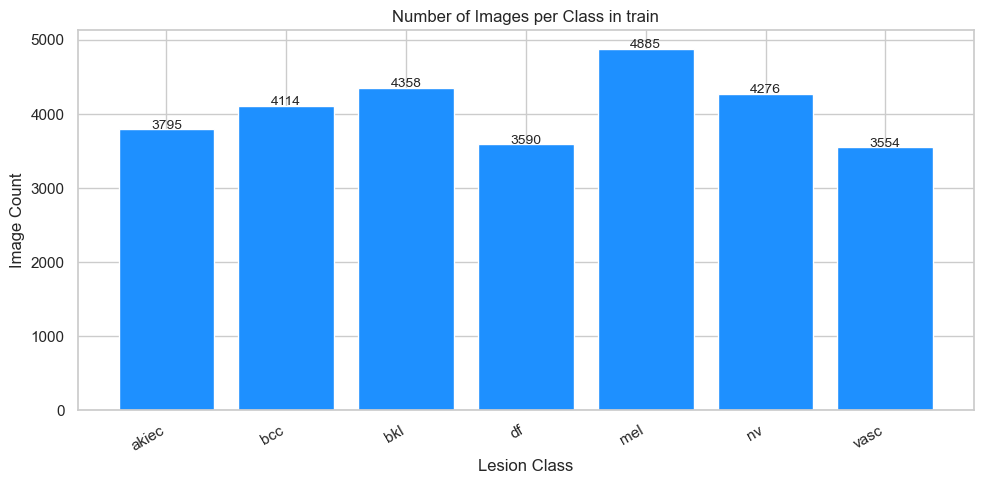

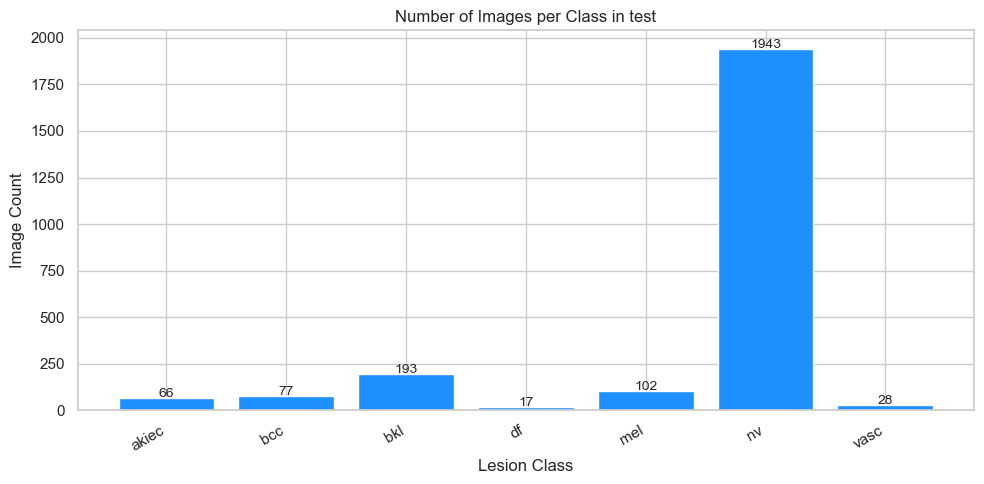

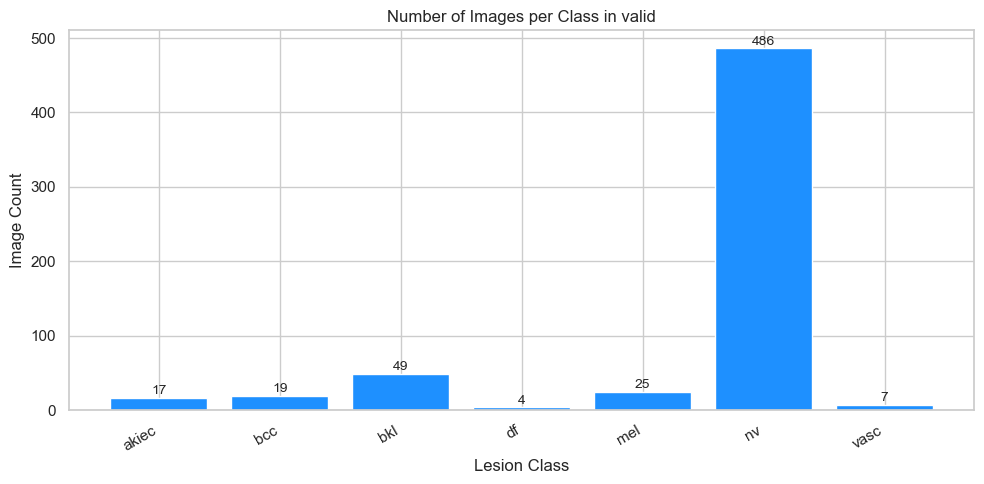

In [43]:
# Sonuçları görselleştir
plot_image_counts(balanced_dir, subfolder='train')
plot_image_counts(balanced_dir, subfolder='test')
plot_image_counts(balanced_dir, subfolder='valid')


In [6]:
%pip install torch torchvision torchaudio


  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/50/9e/acf04ff375b0b49a45511c55d188bcea5c942da2aaf293096676110086d1/torch-2.7.1-cp311-cp311-win_amd64.whl.metadata
  Using cached torch-2.7.1-cp311-cp311-win_amd64.whl.metadata (28 kB)
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/e5/73/1b009b42fe4a7774ba19c23c26bb0f020d68525c417a348b166f1c56044f/torchvision-0.22.1-cp311-cp311-win_amd64.whl.metadata
  Using cached torchvision-0.22.1-cp311-cp311-win_amd64.whl.metadata (6.1 kB)
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/78/cc/11709b2cbf841eda124918523088d9aaa1509ae4400f346192037e6de6c6/torchaudio-2.7.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/4d/36/2a115987e2d8c300a974597416d9de88f2444426de9571f4b59b2cca3acc/filelock-3.18.0-py3-none-any.whl.metadata
  Using cached 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import os
import torch
from torchvision import datasets, transforms, models
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm import tqdm

# Cihaz seçimi
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformlar
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Klasör yolu (tek yerden kontrol)
base_dir = r"C:\Users\sanem\Desktop\cancer\ham10000_project\notebooks\balanced_dir"

train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir  = os.path.join(base_dir, "test")

# Dataset ve DataLoader
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
valid_dataset = datasets.ImageFolder(valid_dir, transform=transform)
test_dataset  = datasets.ImageFolder(test_dir,  transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader  = DataLoader(test_dataset,  batch_size=32, shuffle=False)

# MobileNetV2 Modeli
model = models.mobilenet_v2(pretrained=True)
model.classifier[1] = nn.Linear(model.last_channel, len(train_dataset.classes))
model = model.to(device)

# Kayıp ve optimizasyon
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0
    running_corrects = 0
    total = 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data).item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = running_corrects / total

    # Validation
    model.eval()
    val_loss = 0
    val_corrects = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_corrects += torch.sum(preds == labels.data).item()
            val_total += labels.size(0)

    val_loss /= len(valid_loader)
    val_acc = val_corrects / val_total

    print(f"Epoch {epoch+1} | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")


c:\Users\sanem\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\sanem\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/5: 100%|██████████| 874/874 [59:21<00:00,  4.08s/it]  


Epoch 1 | Train Loss: 0.5536 | Train Acc: 0.7941 | Val Loss: 0.2330 | Val Acc: 0.9292


Epoch 2/5: 100%|██████████| 874/874 [50:10<00:00,  3.44s/it]  


Epoch 2 | Train Loss: 0.2839 | Train Acc: 0.8963 | Val Loss: 0.1849 | Val Acc: 0.9440


Epoch 3/5: 100%|██████████| 874/874 [45:07<00:00,  3.10s/it]


Epoch 3 | Train Loss: 0.2005 | Train Acc: 0.9285 | Val Loss: 0.1479 | Val Acc: 0.9555


Epoch 4/5: 100%|██████████| 874/874 [45:02<00:00,  3.09s/it]


Epoch 4 | Train Loss: 0.1562 | Train Acc: 0.9429 | Val Loss: 0.1341 | Val Acc: 0.9522


Epoch 5/5: 100%|██████████| 874/874 [48:06<00:00,  3.30s/it]


Epoch 5 | Train Loss: 0.1315 | Train Acc: 0.9520 | Val Loss: 0.0990 | Val Acc: 0.9638


In [8]:
torch.save(model.state_dict(), "mobilenet_skin_96.pt")


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Tahminleri ve gerçekleri al
def get_all_preds(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())
    return np.array(all_preds), np.array(all_labels)

preds, labels = get_all_preds(model, test_loader)

# Rapor ve matris
print("📋 Classification Report:\n")
print(classification_report(labels, preds, target_names=test_dataset.classes))

print("📉 Confusion Matrix:\n")
print(confusion_matrix(labels, preds))


📋 Classification Report:

              precision    recall  f1-score   support

       akiec       0.86      0.83      0.85        66
         bcc       0.88      0.92      0.90        77
         bkl       0.91      0.88      0.89       193
          df       1.00      0.94      0.97        17
         mel       0.77      0.77      0.77       102
          nv       0.98      0.99      0.98      1943
        vasc       1.00      1.00      1.00        28

    accuracy                           0.96      2426
   macro avg       0.91      0.90      0.91      2426
weighted avg       0.96      0.96      0.96      2426

📉 Confusion Matrix:

[[  55    6    4    0    0    1    0]
 [   2   71    1    0    0    3    0]
 [   3    1  169    0    6   14    0]
 [   1    0    0   16    0    0    0]
 [   2    0    4    0   79   17    0]
 [   1    3    7    0   18 1914    0]
 [   0    0    0    0    0    0   28]]


In [10]:
import numpy as np

# Sınıf dağılımı (ImageFolder'da targets: sample class indices)
class_counts = np.bincount(train_dataset.targets)
print("Class counts:", class_counts)


Class counts: [3199 3606 3994 3111 4370 6705 2983]


In [20]:
import os
import torch
from torchvision import datasets, transforms, models
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm import tqdm

# Cihaz seçimi
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformlar
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

# Klasör yolu
base_dir = r"C:\Users\Sanem\Masaüstü\cancer\ham10000_project\balanced_dir2"

train_dir = os.path.join(base_dir, "train")
valid_dir = os.path.join(base_dir, "valid")
test_dir = os.path.join(base_dir, "test")

# Dataset ve DataLoader
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
valid_dataset = datasets.ImageFolder(valid_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Buradan sonra fine-tuning kodu başlamalı
model = models.mobilenet_v2(pretrained=True)
# ... (geri kalan fine-tuning kodu)

# Önce tüm parametreleri dondur
for param in model.parameters():
    param.requires_grad = False

# Son katmanı değiştir
if isinstance(model.classifier, nn.Sequential):
    model.classifier[1] = nn.Linear(model.last_channel, num_classes)
else:
    model.classifier = nn.Linear(model.last_channel, num_classes)


# Fine-tuning için son birkaç katmanın parametrelerini çöz
# Son 3 inverted residual bloğunu fine-tune et
fine_tune_layers = ['features.17', 'features.18', 'classifier']
for name, param in model.named_parameters():
    if any(layer in name for layer in fine_tune_layers):
        param.requires_grad = True

model = model.to(device)

# İki farklı öğrenme oranı kullan
optimizer = optim.Adam([
    {'params': [p for n, p in model.named_parameters() if 'classifier' not in n and p.requires_grad],
     'lr': 1e-5},  # Daha düşük öğrenme oranı
    {'params': model.classifier.parameters(),
     'lr': 1e-4}   # Daha yüksek öğrenme oranı
])

# Öğrenme oranı programlayıcısı
# Öğrenme oranı programlayıcısı
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', 
                                               factor=0.1, patience=3)

criterion = nn.CrossEntropyLoss()
epochs = 10
best_val_acc = 0.0

for epoch in range(epochs):
    model.train()
    running_loss = 0
    running_corrects = 0
    total = 0

    for inputs, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{epochs}"):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data).item()
        total += labels.size(0)

    train_loss = running_loss / len(train_loader)
    train_acc = running_corrects / total

    # Validation
    model.eval()
    val_loss = 0
    val_corrects = 0
    val_total = 0
    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, preds = torch.max(outputs, 1)
            val_corrects += torch.sum(preds == labels.data).item()
            val_total += labels.size(0)

    val_loss /= len(valid_loader)
    val_acc = val_corrects / val_total
    
    # Öğrenme oranını ayarla
    scheduler.step(val_loss)
    
    # En iyi modeli kaydet
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        torch.save(model.state_dict(), 'best_model.pth')

    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | "
          f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f}")

Epoch 1/10:  58%|█████▊    | 522/893 [19:15<13:40,  2.21s/it]


UnidentifiedImageError: cannot identify image file <_io.BufferedReader name='C:\\Users\\Sanem\\Masaüstü\\cancer\\ham10000_project\\balanced_dir2\\train\\mel\\ISIC_0032685.jpg'>

In [8]:
%pip install tqdm

  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/d0/30/dc54f88dd4a2b5dc8a0279bdd7270e735851848b762aeb1c1184ed1f6b14/tqdm-4.67.1-py3-none-any.whl.metadata
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
